In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
from pandas_profiling import ProfileReport
sns.set_style('darkgrid')


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dropout
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
init_notebook_mode(connected=True)
print(__version__) # requires version >= 1.9.0

5.18.0


In [3]:
data=pd.read_csv('../data/insurance_claims.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
data.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
profile = ProfileReport(data, title="Pandas Profiling Report")

profile.to_file("EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
data.drop('_c39',axis=1,inplace=True)

In [11]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [12]:
object_columns = list(data.select_dtypes(['object']).columns)
len(object_columns)

21

In [13]:
numeric_columns=list(data.select_dtypes('number'))
len(numeric_columns)

18

In [14]:
data.select_dtypes('number').describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [15]:
data.select_dtypes('object').describe()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,...,4,5,7,7,1000,3,3,14,39,2
top,2006-01-01,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2015-02-02,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,9935 4th Drive,?,?,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,...,354,292,262,157,1,360,343,80,43,753


In [16]:
data.duplicated().sum()

0

In [17]:
object_columns

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [18]:
for column in object_columns: 
    print("\033[1m","*, Column: ", column,"\033[0m")   
    print('\t',len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), 
          "% non-null") 
    if len(data[column].unique())<=10:
            print('\t',data[column].unique())


 *, Column:  policy_bind_date 
	 951 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  policy_state 
	 3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['OH' 'IN' 'IL']
 *, Column:  policy_csl 
	 3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['250/500' '100/300' '500/1000']
 *, Column:  insured_sex 
	 2 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['MALE' 'FEMALE']
 *, Column:  insured_education_level 
	 7 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
 *, Column:  insured_occupation 
	 14 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  insured_hobbies 
	 20 unique values 	 & 	 1000 non-null values	 100.0 % non-null
 *, Column:  insured_relationship 
	 6 unique values 	 & 	 1000 non-null values	 100.0 % non-null
	 ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
 *, Column:  incident_date 
	

In [19]:
nulldata=(data[object_columns]=='?').sum()
nulldata

policy_bind_date             0
policy_state                 0
policy_csl                   0
insured_sex                  0
insured_education_level      0
insured_occupation           0
insured_hobbies              0
insured_relationship         0
incident_date                0
incident_type                0
collision_type             178
incident_severity            0
authorities_contacted        0
incident_state               0
incident_city                0
incident_location            0
property_damage            360
police_report_available    343
auto_make                    0
auto_model                   0
fraud_reported               0
dtype: int64

Các cột như collision_type (loại hình va chạm), property_damage (thiệt hại tài sản), police_report_available (báo cáo của cảnh sát) không thế nào mang giá trị đặc biệt dấu '?' được. Có thể trong quá trình thu thập dữ liệu xuất hiện lỗi, sơ sót, hoặc điều tra viên, bộ phận thu thập dữ liệu không xác định rõ.
Các thuộc tính trên có thể là một đặc trưng quan trọng trong những mô hình dự đoán liên quan đến mức độ thiệt hại hoặc hồ sơ thật giả của công ty bảo hiểm, cần lưu ý để tránh đưa ra sai sót trong quá trình phân tích dữ liệu

In [20]:
for column in object_columns:
    print('-'*100)
    print("*, Column: ", column)
    print(data[column].value_counts())
    print('-'*100)

----------------------------------------------------------------------------------------------------
*, Column:  policy_bind_date
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
*, Column:  policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
--------------------------------------------------

In [21]:
for column in object_columns:
    if len(data[column].unique())<=10:
        data[column].value_counts().iplot(kind='bar',title=column, 
                                        xTitle=column, 
                                        yTitle='Values')

    


In [22]:
#Biến liên tục
numeric_columns = list(data.select_dtypes(['number']).columns)
numeric_columns

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [23]:
for column in numeric_columns: 
    print("*, Column: ", column)   
    print(len(data[column].unique()), "unique values", "\t & \t", 
          data[column].notnull().sum(), "non-null values\t", 
          round(100* data[column].notnull().sum()/len(data[column]),2), 
          "% non-null")
    if len(data[column].unique())<=10:
        print(data[column].unique())
    
   

*, Column:  months_as_customer
391 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  age
46 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  policy_number
1000 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  policy_deductable
3 unique values 	 & 	 1000 non-null values	 100.0 % non-null
[1000 2000  500]
*, Column:  policy_annual_premium
991 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  umbrella_limit
11 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  insured_zip
995 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  capital-gains
338 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  capital-loss
354 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  incident_hour_of_the_day
24 unique values 	 & 	 1000 non-null values	 100.0 % non-null
*, Column:  number_of_vehicles_involved
4 unique values 	 & 	 1000 non-null value

In [24]:
change_tocategory=[i for i in numeric_columns if len(data[i].unique())<=10]
change_tocategory

['policy_deductable',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses']

In [25]:
data[change_tocategory]=data[change_tocategory].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   object 
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [26]:
for c in numeric_columns:
    data[c].iplot(kind='hist',title=c,xTitle=c)
    plt.show()

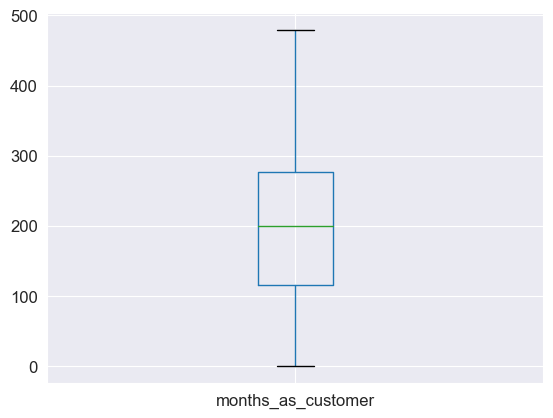

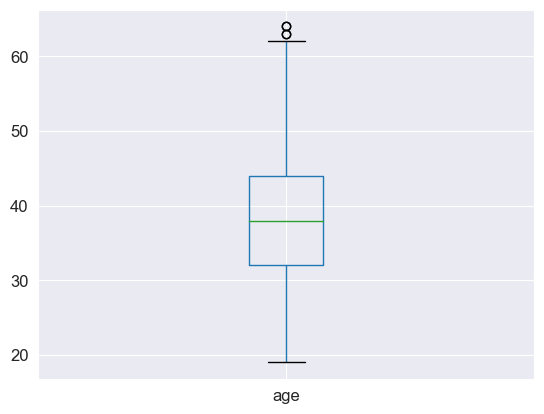

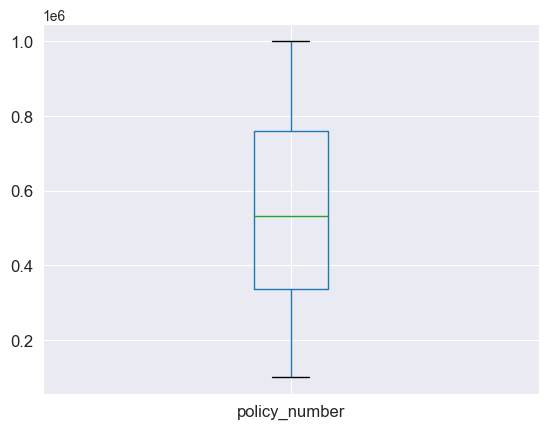

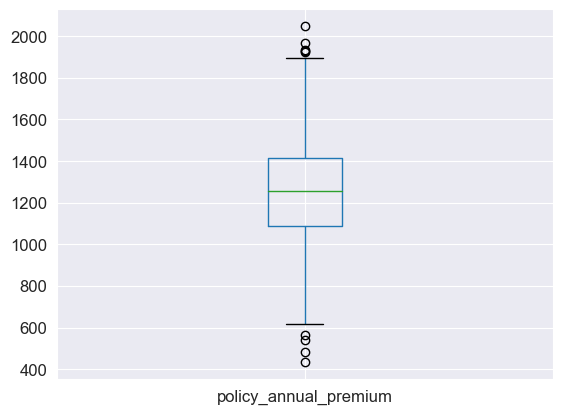

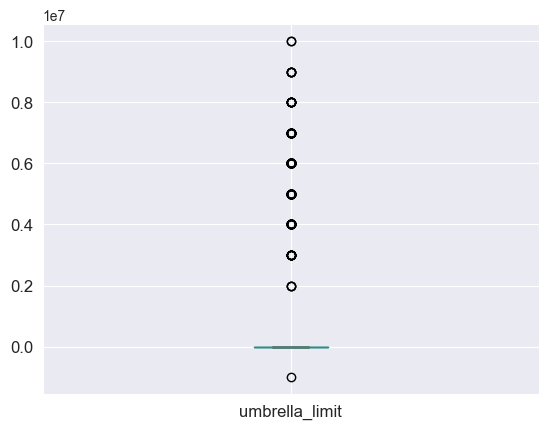

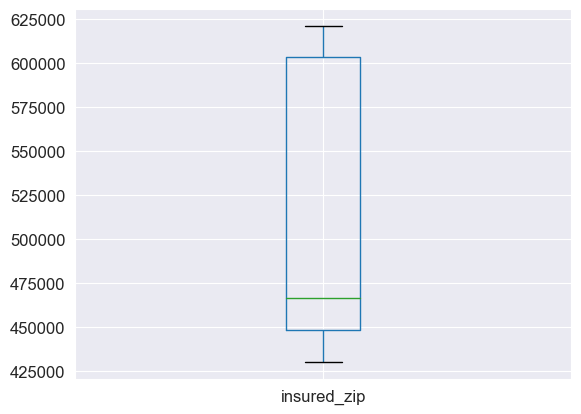

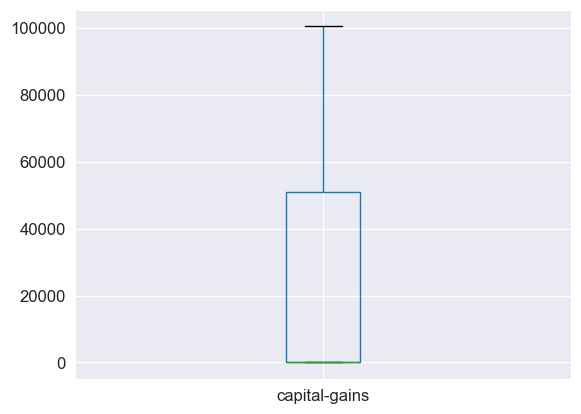

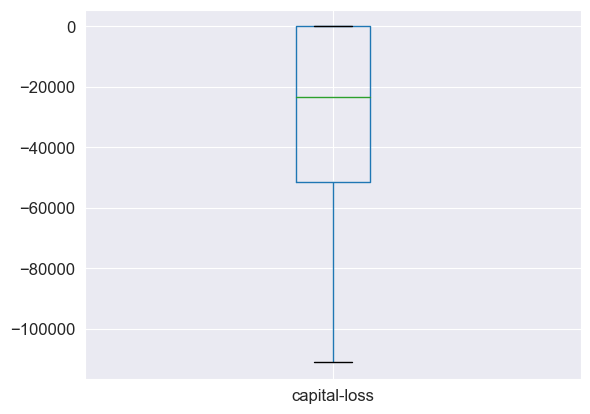

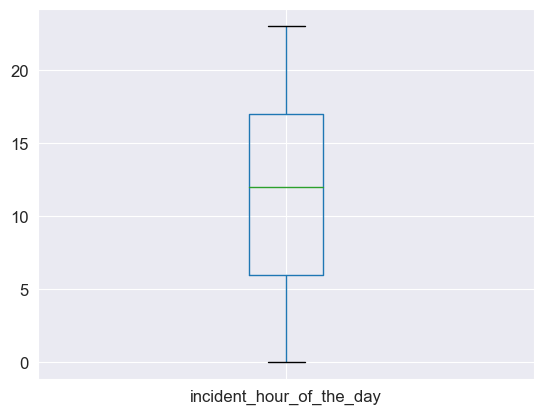

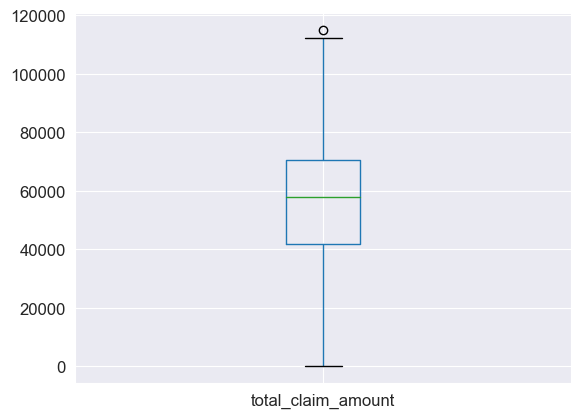

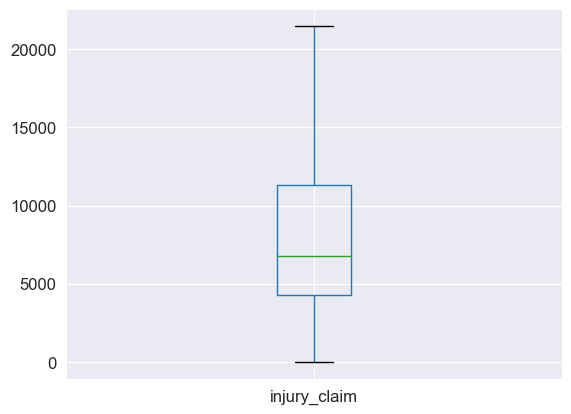

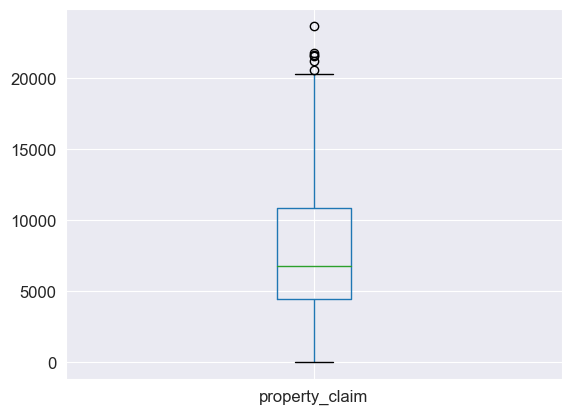

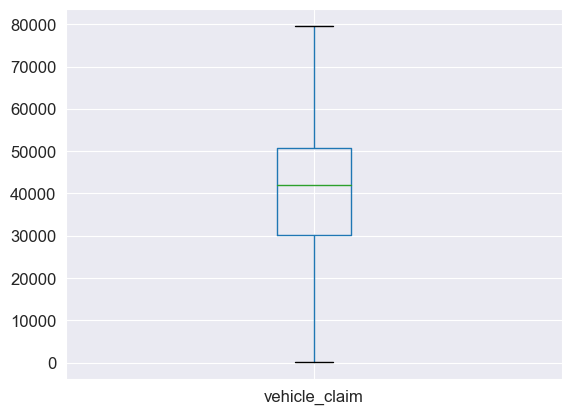

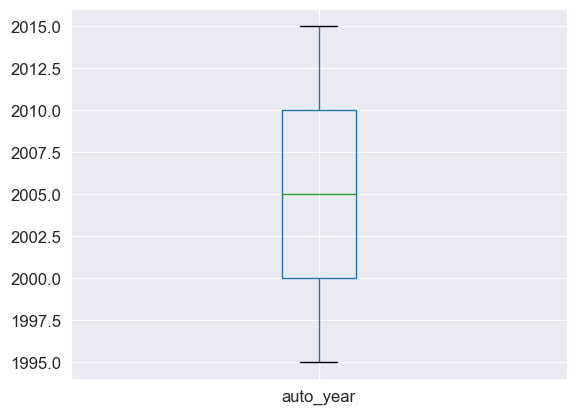

In [27]:
numeric_columns=data.select_dtypes(['number']).columns
for c in numeric_columns:
    plt.figure()
    data.boxplot(c, rot=0, grid=True, fontsize=12);
    plt.show()

In [28]:
def check_outliers(name):
    we=data[name].values
    Q1=np.quantile(we,0.25)
    Q3=np.quantile(we,0.75)
    IQR=Q3-Q1
    print("Q1: ",Q1,"Q3: ",Q3,"IQR:",IQR)
    outliers=np.unique(we[[(n<Q1-1.5*IQR)|(n>Q3+1.5*IQR) for n in we]])
    indexes=[we.tolist().index(i) for i in outliers]
    print("Indexes of outliers: ", len(indexes))
    print("Outlier values", we[indexes])

In [29]:
for col in numeric_columns:
    check_outliers(col)

Q1:  115.75 Q3:  276.25 IQR: 160.5
Indexes of outliers:  0
Outlier values []
Q1:  32.0 Q3:  44.0 IQR: 12.0
Indexes of outliers:  2
Outlier values [63 64]
Q1:  335980.25 Q3:  759099.75 IQR: 423119.5
Indexes of outliers:  0
Outlier values []
Q1:  1089.6075 Q3:  1415.6950000000002 IQR: 326.0875000000001
Indexes of outliers:  9
Outlier values [ 433.33  484.67  538.17  566.11 1922.84 1927.87 1935.85 1969.63 2047.59]
Q1:  0.0 Q3:  0.0 IQR: 0.0
Indexes of outliers:  10
Outlier values [-1000000  2000000  3000000  4000000  5000000  6000000  7000000  8000000
  9000000 10000000]
Q1:  448404.5 Q3:  603251.0 IQR: 154846.5
Indexes of outliers:  0
Outlier values []
Q1:  0.0 Q3:  51025.0 IQR: 51025.0
Indexes of outliers:  0
Outlier values []
Q1:  -51500.0 Q3:  0.0 IQR: 51500.0
Indexes of outliers:  0
Outlier values []
Q1:  6.0 Q3:  17.0 IQR: 11.0
Indexes of outliers:  0
Outlier values []
Q1:  41812.5 Q3:  70592.5 IQR: 28780.0
Indexes of outliers:  1
Outlier values [114920]
Q1:  4295.0 Q3:  11305.0 IQR

In [30]:
data[numeric_columns].describe()

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [31]:
corrle=data[numeric_columns].corr()
corrle

,months_as_customer,age,policy_number,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_annual_premium,0.005018,0.014404,0.022566,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.217702,0.165768,0.179536,0.215626,0.021368
total_claim_amount,0.062108,0.069863,-0.018009,0.009094,-0.040344,-0.033873,0.015980,-0.036060,0.217702,1.000000,0.805025,0.810686,0.982773,-0.035781


[Text(0, 0, 'months_as_customer'),
 Text(0, 1, 'age'),
 Text(0, 2, 'policy_number'),
 Text(0, 3, 'policy_annual_premium'),
 Text(0, 4, 'umbrella_limit'),
 Text(0, 5, 'insured_zip'),
 Text(0, 6, 'capital-gains'),
 Text(0, 7, 'capital-loss'),
 Text(0, 8, 'incident_hour_of_the_day'),
 Text(0, 9, 'total_claim_amount'),
 Text(0, 10, 'injury_claim'),
 Text(0, 11, 'property_claim'),
 Text(0, 12, 'vehicle_claim'),
 Text(0, 13, 'auto_year')]

<Figure size 1000x1000 with 0 Axes>

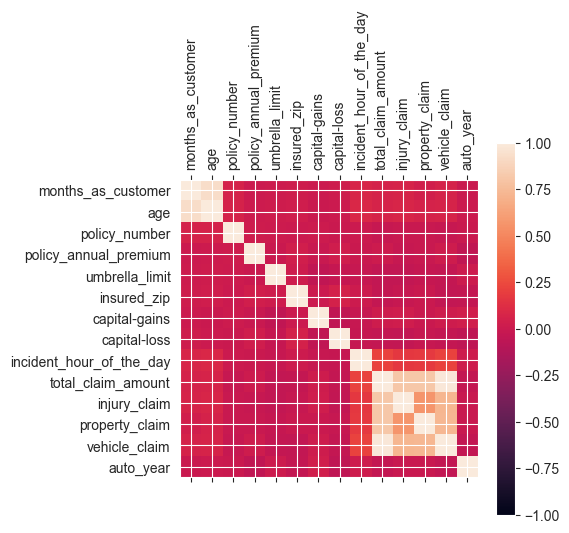

In [32]:
plt.figure(figsize=(10,10))
plt.matshow(corrle,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,len(numeric_columns)), rotation = 90);
plt.yticks(np.arange(0,len(numeric_columns)), rotation = 0);
plt.gca().set_xticklabels(list(numeric_columns))
plt.gca().set_yticklabels(list(numeric_columns))

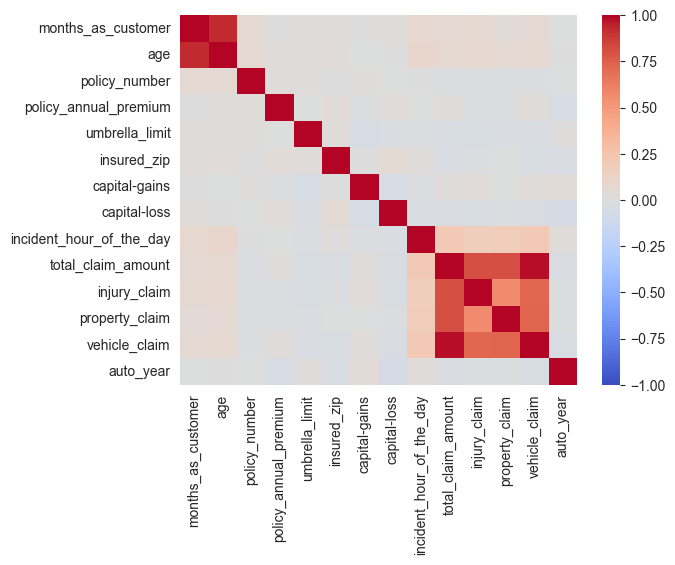

In [33]:
sns.heatmap(corrle,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

In [34]:
data['incident_date']=pd.to_datetime(data['incident_date'])
data['day']=data['incident_date'].dt.day
data['month']=data['incident_date'].dt.month
data['year']=data['incident_date'].dt.year

In [35]:
data.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)
object_columns = list(data.select_dtypes(['object']).columns)



In [36]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'day', 'month', 'year'],
      dtype='object')

In [37]:
data.insured_sex.value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

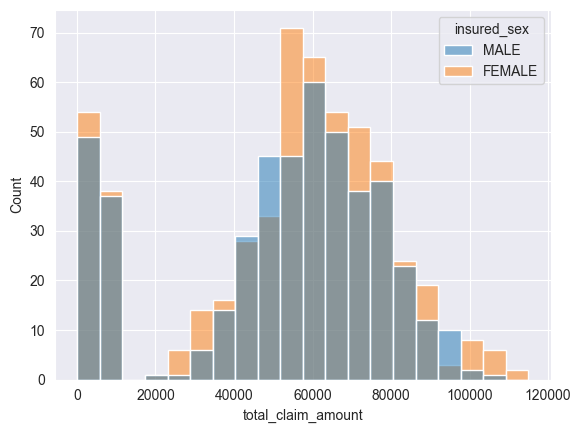

In [38]:
sns.histplot(data=data, x='total_claim_amount', hue='insured_sex'); # histogram và phân loại

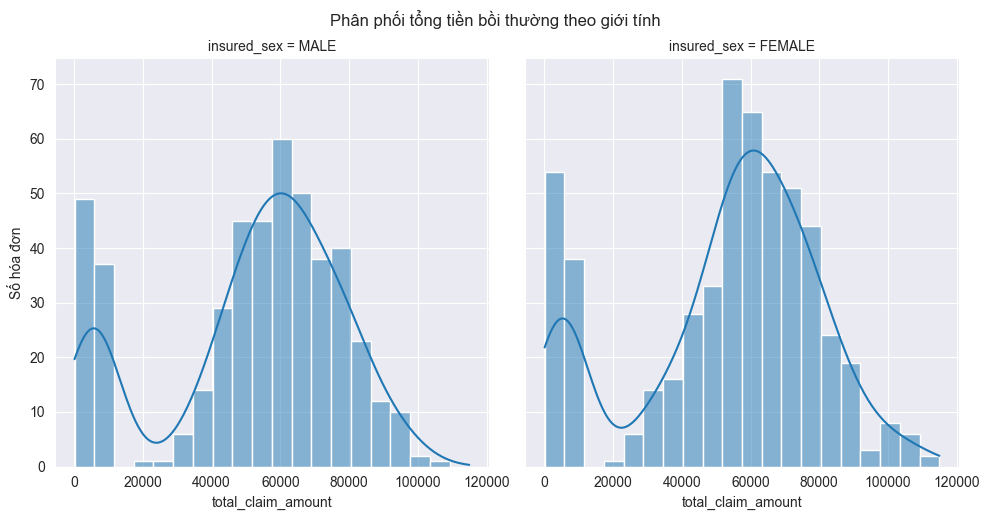

In [39]:
g = sns.displot(data, x = 'total_claim_amount', col= 'insured_sex', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối tổng tiền bồi thường theo giới tính', y = 1.03)
g.set_ylabels('Số hóa đơn')
plt.show()

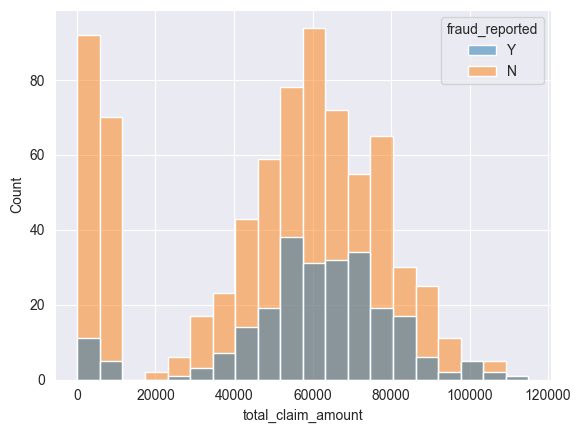

In [40]:
sns.histplot(data=data, x='total_claim_amount', hue='fraud_reported'); # histogram và phân loại

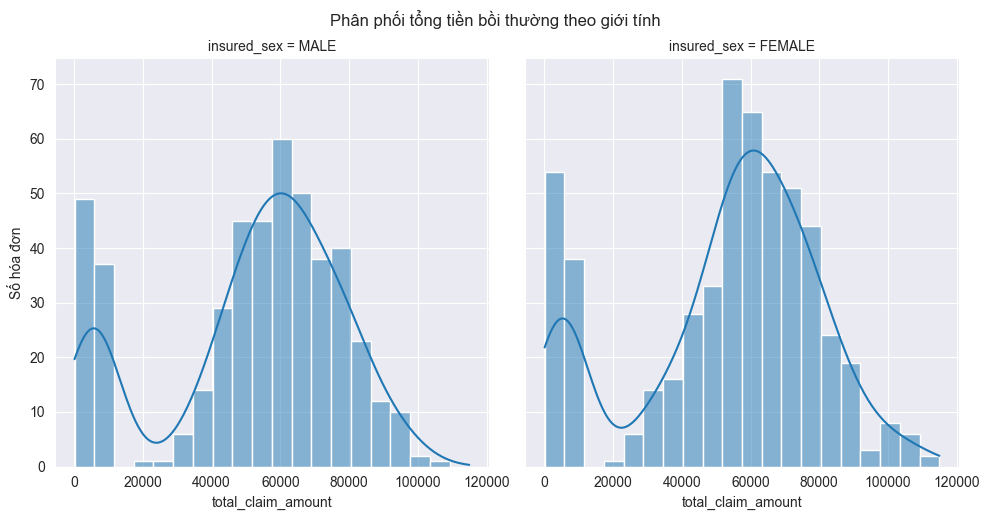

In [41]:
g = sns.displot(data, x = 'total_claim_amount', col= 'insured_sex', kde = True) # chỉ vẽ kde: kind = 'kde'
plt.suptitle('Phân phối tổng tiền bồi thường theo giới tính', y = 1.03)
g.set_ylabels('Số hóa đơn')
plt.show()

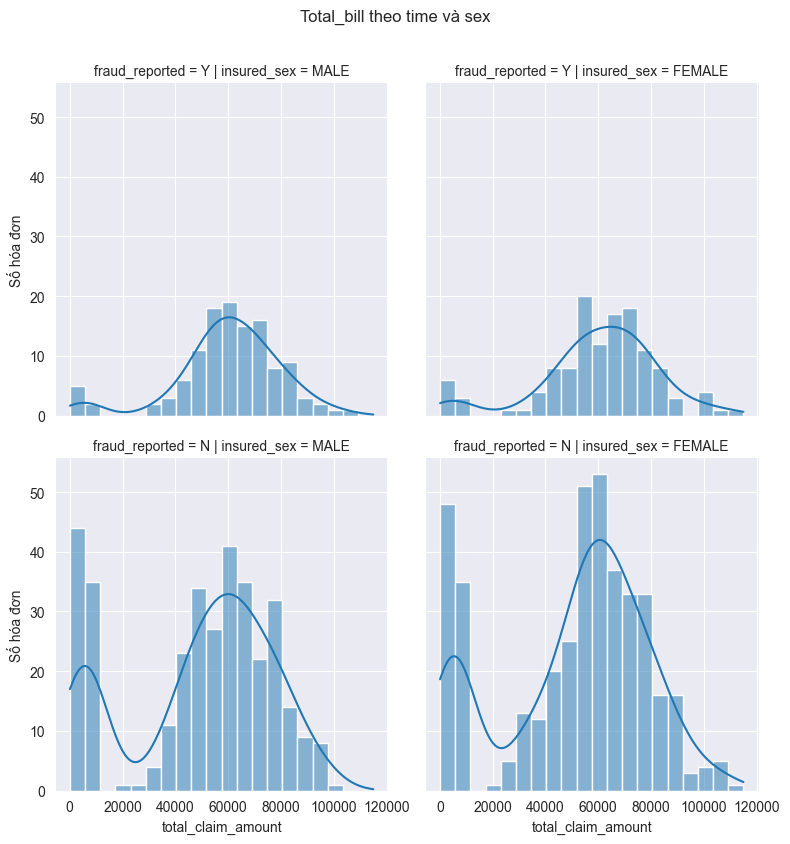

In [42]:
g = sns.displot(data, x = 'total_claim_amount', col= 'insured_sex', row = 'fraud_reported', height=4,kde=True)
plt.suptitle('Total_bill theo time và sex', y = 1.05)
g.set_ylabels('Số hóa đơn')
plt.show()

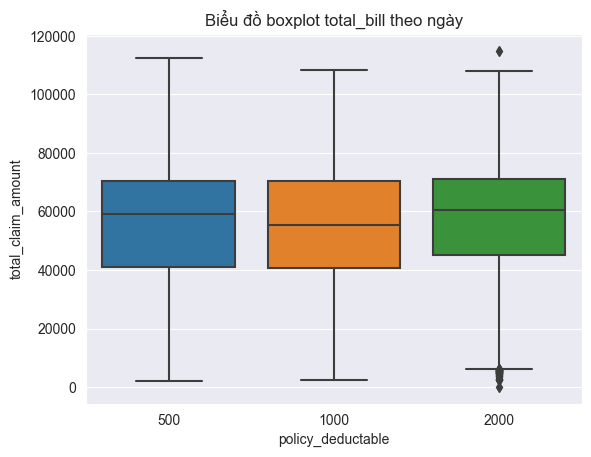

In [43]:
sns.boxplot(data=data, x="policy_deductable", y="total_claim_amount")
plt.title('Biểu đồ boxplot total_bill theo ngày')
plt.show()

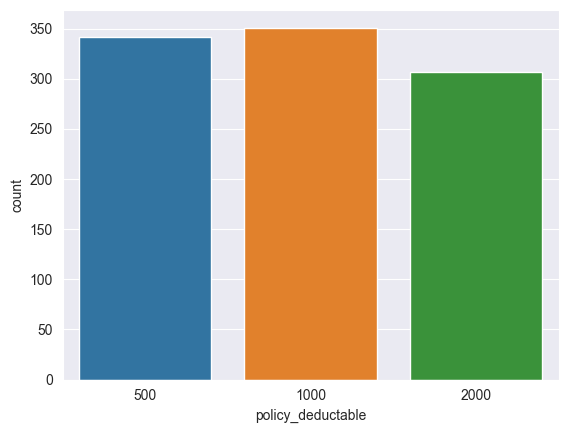

In [44]:
sns.countplot(x='policy_deductable', data=data);

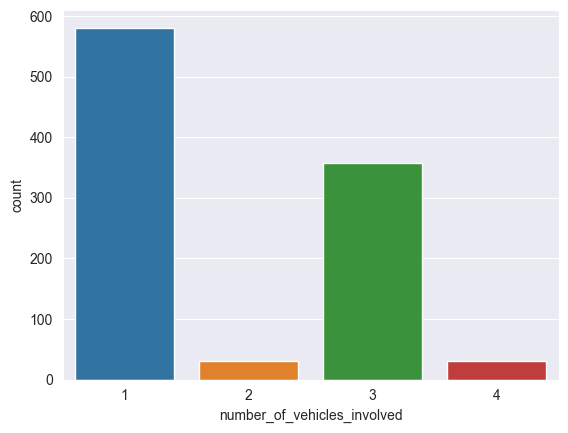

In [45]:
sns.countplot(x='number_of_vehicles_involved', data=data);

In [46]:
check_claim=data[['injury_claim','property_claim','vehicle_claim']].sum()
check_claim

injury_claim       7433420
property_claim     7399570
vehicle_claim     37928950
dtype: int64

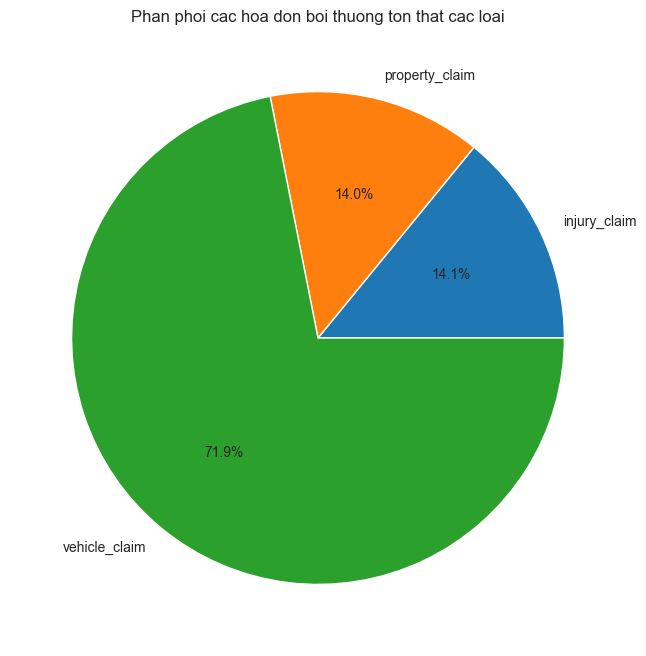

In [47]:
plt.figure(figsize = (10,8))
plt.title('Phan phoi cac hoa don boi thuong ton that cac loai')
plt.pie(check_claim, labels = check_claim.index, autopct = '%1.1f%%', startangle=0)
plt.show()

<Figure size 1000x800 with 0 Axes>

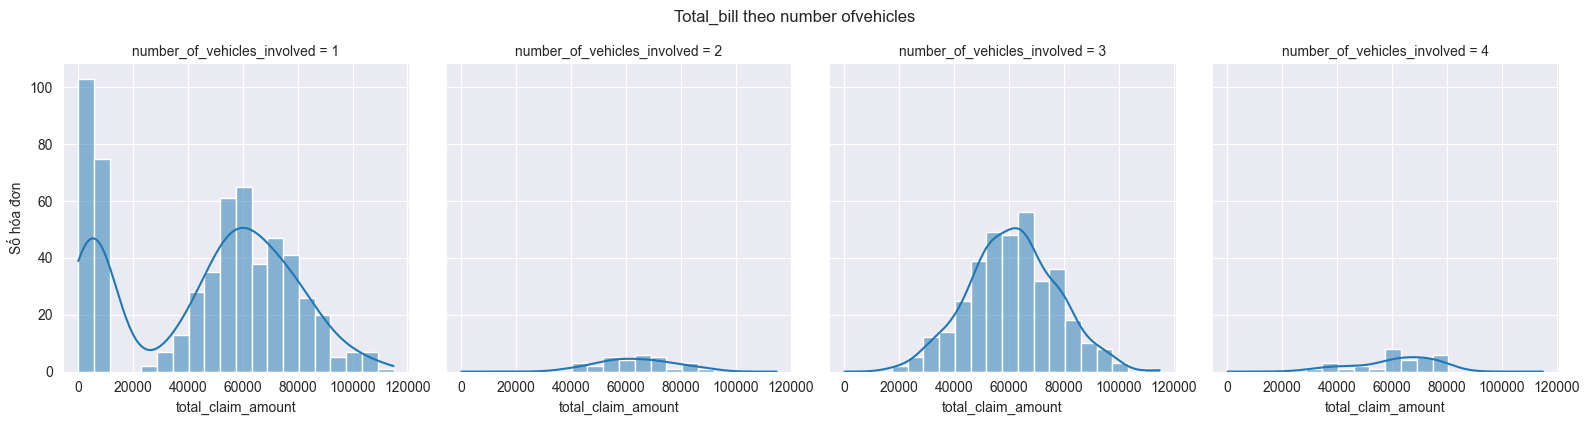

In [48]:
plt.figure(figsize=(10,8))
g = sns.displot(data, x = 'total_claim_amount', col='number_of_vehicles_involved', height=4,kde=True)
plt.suptitle('Total_bill theo number ofvehicles', y = 1.05)
g.set_ylabels('Số hóa đơn')
plt.show()

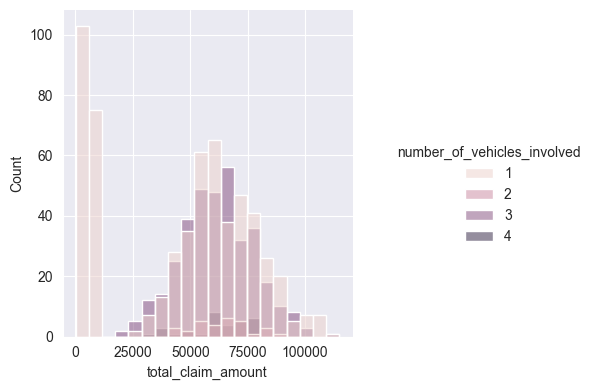

In [49]:
g = sns.displot(data, x = 'total_claim_amount', hue='number_of_vehicles_involved', height=4)


In [50]:
data.bodily_injuries.value_counts()

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64

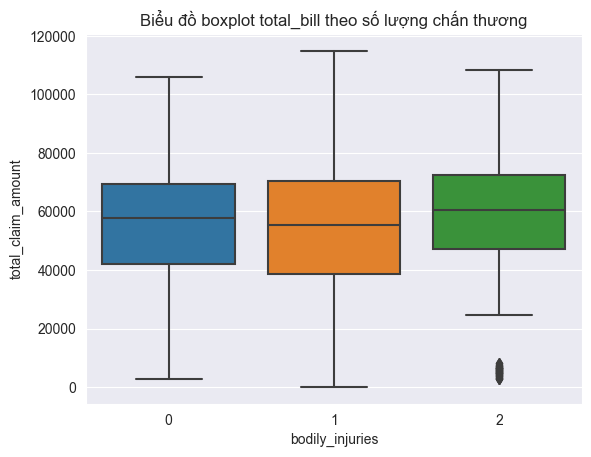

In [51]:
sns.boxplot(data=data, x="bodily_injuries", y="total_claim_amount")
plt.title('Biểu đồ boxplot total_bill theo số lượng chấn thương')
plt.show()

In [52]:
acc_check=data.groupby(['number_of_vehicles_involved'])['vehicle_claim'].count()
acc_check


number_of_vehicles_involved
1    581
2     30
3    358
4     31
Name: vehicle_claim, dtype: int64

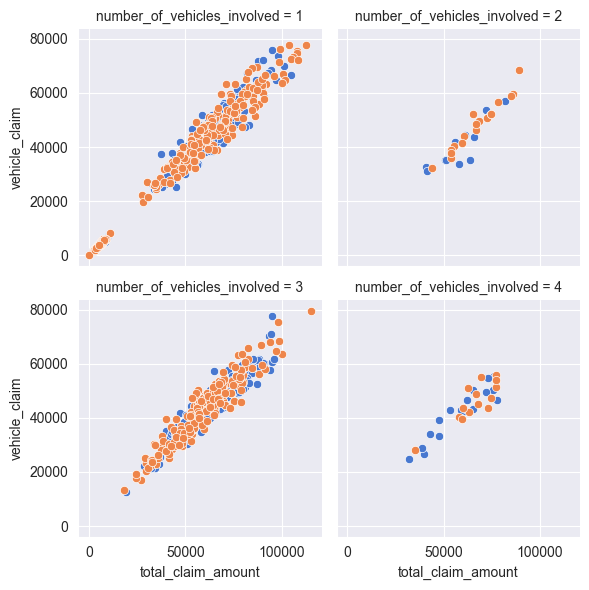

In [53]:
palette = sns.color_palette("muted")
g = sns.FacetGrid(data, col="number_of_vehicles_involved",hue='insured_sex', palette=palette,col_wrap=2)

#Sử dụng hàm map() để vẽ đồ thị trên các ô dữ liệu trong lưới
g.map(sns.scatterplot,"total_claim_amount", "vehicle_claim")
plt.show()

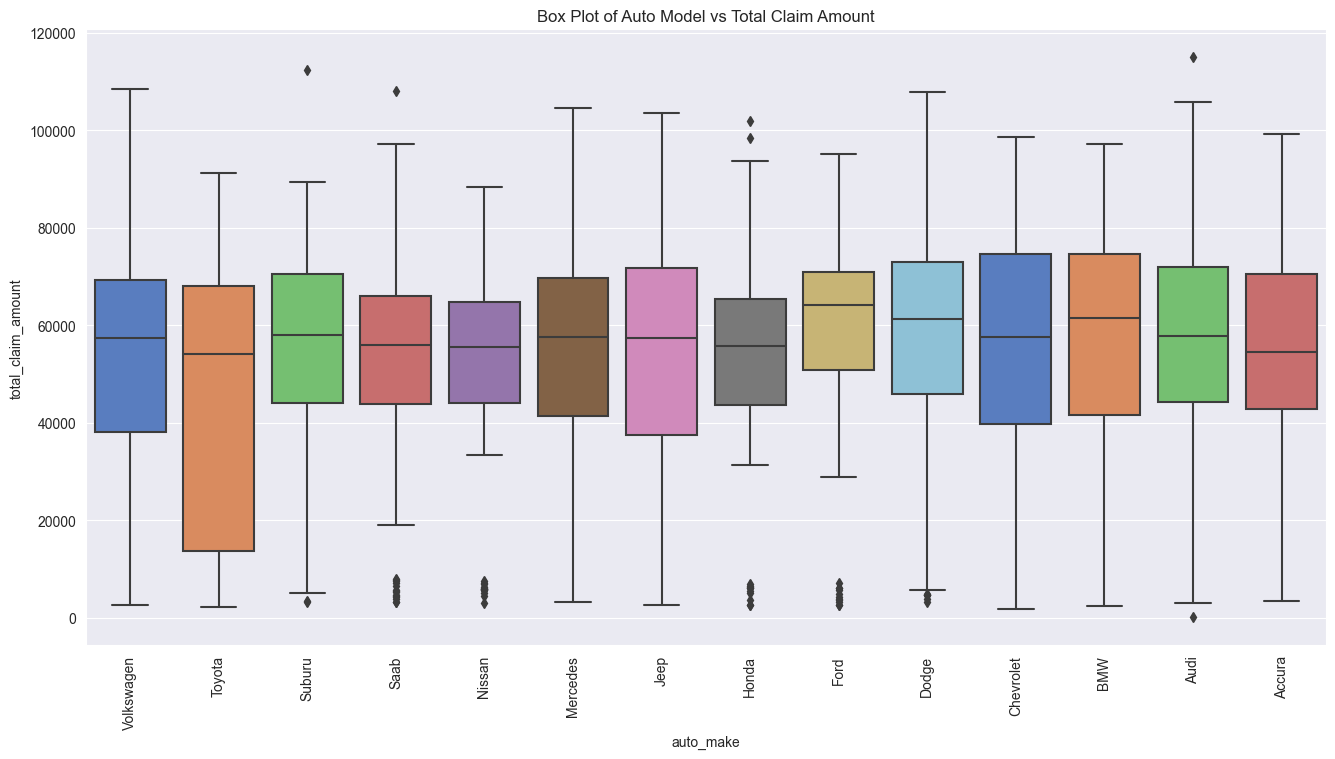

In [54]:
palette = sns.color_palette("muted")
plt.figure(figsize=(16, 8))

my_order = data.groupby(by=["auto_make"])["total_claim_amount"].median().iloc[::-1].index

sns.boxplot(x = 'auto_make', y = 'total_claim_amount' ,data = data, order = my_order,palette=palette).set(title = 'Box Plot of Auto Model vs Total Claim Amount')
plt.xticks(rotation = 90);

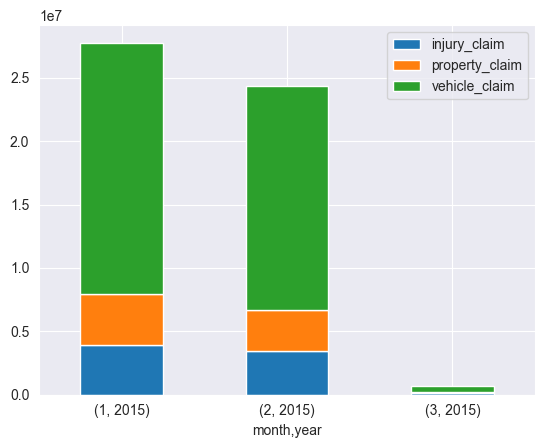

In [55]:
check_feeinmonth=data.groupby(['month','year'])[['injury_claim','property_claim','vehicle_claim']].sum()
check_feeinmonth.plot.bar(stacked = True, rot = 0)
plt.legend(loc = 'upper right')
plt.show()

In [56]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'day', 'month', 'year'],
      dtype='object')

In [57]:
data.groupby(['month','year']).count()

,,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day
month,year,,,,,,,,,,,,,,,,,,,,,
1,2015,516,516,516,516,516,516,516,516,516,516,...,516,516,516,516,516,516,516,516,516,516
2,2015,472,472,472,472,472,472,472,472,472,472,...,472,472,472,472,472,472,472,472,472,472
3,2015,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


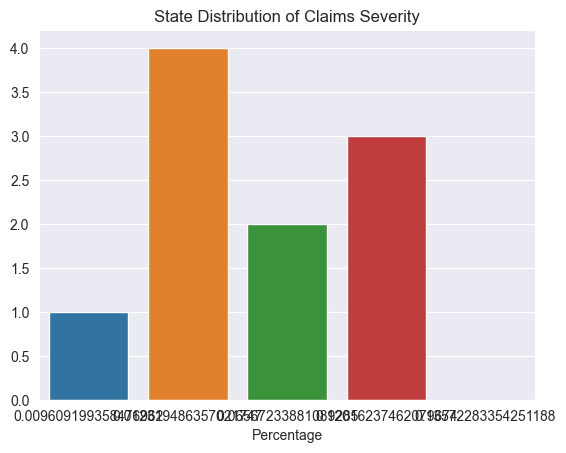

0      0.135723
1      0.009609
2      0.065672
3      0.120162
4      0.012319
         ...   
995    0.165271
996    0.205603
997    0.127933
998    0.089041
999    0.009590
Name: total_claim_amount, Length: 1000, dtype: float64

In [58]:
State_claims_pct = data.total_claim_amount * 100/ data.total_claim_amount.sum()

sns.barplot(x=State_claims_pct.head(5), y=State_claims_pct.head(5).index)

plt.title('State Distribution of Claims Severity')
plt.ylabel(None);
plt.xlabel('Percentage')
plt.show()
State_claims_pct

In [59]:

data['collision_type'].replace('?',np.nan,inplace=True)
data['collision_type'].fillna(method='ffill',inplace=True)

data['police_report_available'].replace('?',np.nan,inplace=True)
data['police_report_available'].fillna(method='ffill',inplace=True)

data['property_damage'].replace('?',np.nan,inplace=True)
data['property_damage'].fillna(method='ffill',inplace=True)
(data[object_columns]=='?').sum()

data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [60]:
data['police_report_available'].value_counts()

NO     525
YES    475
Name: police_report_available, dtype: int64

In [61]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_csl                      object
policy_deductable               object
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved     object
property_damage          

result=['total_claim_amount','injury_claim','property_claim','vehicle_claim']
x = data_predict.drop(result,axis=1)
y = data_predict['total_claim_amount']
x

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print([X_train.shape,Y_train.shape],[X_test.shape,Y_test.shape])

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

In [62]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

# Chuẩn hóa dữ liệu số
x_num=data.drop('total_claim_amount',axis=1)
numeric_cols = x_num.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data
data

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day,month,year
0,1.078140,0.990836,-0.095953,2,1,1,0.616705,-0.479476,-0.489529,1,...,-0.189283,1.165505,0.749653,10,1,-0.183440,1,1.154424,-0.947587,0.0
1,0.208995,0.334073,-0.791527,1,1,2,-0.242521,1.697980,-0.461008,1,...,-1.363822,-1.372696,-1.823346,8,12,0.315491,1,0.692885,-0.947587,0.0
2,-0.608002,-1.088913,0.550566,2,0,2,0.642233,1.697980,-0.984885,0,...,0.054644,-0.736072,-0.785565,4,30,0.315491,0,0.808270,0.962871,0.0
3,0.452355,0.224613,-1.239334,0,1,2,0.652886,2.133471,1.491682,0,...,-0.224130,-0.219722,0.677607,3,34,1.479664,1,-0.576347,-0.947587,0.0
4,0.208995,0.552994,-0.695834,0,2,1,1.341980,2.133471,1.527808,1,...,-1.257232,-1.399654,-1.768252,0,31,0.648112,0,0.231346,0.962871,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.539740,2,2,1,0.222884,-0.479476,-0.975717,0,...,2.051155,0.273817,1.224309,6,6,0.149180,0,0.808270,0.962871,0.0
996,0.704407,0.224613,-1.398429,0,0,1,0.739141,-0.479476,1.492519,0,...,2.182342,2.214794,1.821868,13,28,1.645974,0,1.039039,-0.947587,0.0
997,-0.642767,-0.541611,1.448920,2,1,0,0.520739,0.826998,-0.815138,0,...,0.013648,0.020826,0.771902,11,19,-1.513924,0,0.923655,-0.947587,0.0
998,2.208028,2.523284,-0.047867,0,2,2,0.411866,1.697980,-0.830250,1,...,-0.453708,-0.451976,-0.073580,1,5,-1.181303,0,1.269809,0.962871,0.0


In [63]:
target = data['fraud_reported']
features = data.drop('fraud_reported', axis=1)
print(target.shape,features.shape)

(1000,) (1000, 39)


In [64]:
print("PCA")
pca=PCA(n_components=3)
fit=pca.fit(features)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print("hvjkfdhfskdf",fit.components_)


PCA
Explained Variance: [9.99880042e-01 1.19633296e-04 1.78420868e-07]
hvjkfdhfskdf [[ 2.35361513e-06  2.64748115e-06 -6.82476410e-07 -1.88909583e-07
  -1.69907873e-06  5.12157463e-07  3.44612934e-07 -1.52886005e-06
  -1.28365005e-06 -4.48338556e-07  5.47805020e-06  5.62090452e-07
  -9.64584107e-07  1.41915039e-07  6.05590776e-07 -1.36652679e-06
  -1.13337703e-05 -7.27189575e-07 -1.30017600e-05 -9.82676683e-06
  -3.58327940e-06  3.19250387e-06  1.58429167e-04  8.24994978e-06
   1.05848436e-05  2.94770329e-07  1.46287781e-06 -4.67841030e-07
   1.01161025e-06  9.99999985e-01  3.05068730e-05  3.07214015e-05
   3.72427202e-05 -8.78873438e-06  1.71934121e-05 -1.35593687e-06
  -1.26528897e-06 -1.35595527e-06 -0.00000000e+00]
 [-5.03462106e-05 -4.19722744e-05  5.76993547e-05  8.52420794e-05
   1.35157283e-04 -1.25303599e-05  6.15074007e-05  5.22949598e-05
  -4.62796838e-05  2.96943250e-05  7.43896799e-05 -3.73431385e-04
   4.43128720e-04 -9.91549373e-05  1.21139896e-04 -1.09979726e-04
   1.24

In [65]:
reg = LogisticRegression()
reg.fit(features, target)

# Tạo một SelectFromModel để chọn đặc trưng dựa trên mức độ quan trọng
lasso = LassoCV().fit(features, target)
selector = SelectFromModel(lasso, prefit=True)

# Chọn và lọc ra các đặc trưng quan trọng
selected_features = features.columns[(selector.get_support())]

# Kết quả
print("Các đặc trưng được chọn:")
print(selected_features)

Các đặc trưng được chọn:
Index([], dtype='object')


In [66]:
coefficients = lasso.coef_

# Tạo DataFrame từ hệ số và tên đặc trưng
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': coefficients
})

# Loại bỏ đặc trưng với hệ số bằng 0 (được Lasso loại bỏ)
print('bi loai bo',feature_importance[feature_importance['Coefficient'] == 0])
feature_importance = feature_importance[feature_importance['Coefficient'] != 0]
# Sắp xếp đặc trưng theo giá trị tuyệt đối của hệ số
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Absolute Coefficient', ascending=False, inplace=True)

# Hiển thị kết quả
print("Xếp hạng các đặc trưng theo mức độ quan trọng:")
print(feature_importance[['Feature', 'Coefficient']])

bi loai bo                         Feature  Coefficient
0            months_as_customer          0.0
1                           age          0.0
2                 policy_number         -0.0
3                  policy_state          0.0
4                    policy_csl         -0.0
5             policy_deductable          0.0
6         policy_annual_premium         -0.0
7                umbrella_limit          0.0
8                   insured_zip          0.0
9                   insured_sex          0.0
10      insured_education_level         -0.0
11           insured_occupation          0.0
12              insured_hobbies         -0.0
13         insured_relationship          0.0
14                capital-gains         -0.0
15                 capital-loss         -0.0
16                incident_type         -0.0
17               collision_type          0.0
18            incident_severity         -0.0
19        authorities_contacted         -0.0
20               incident_state         -0.0

In [67]:
print("RFE")
model=LogisticRegression()
rfe=RFE(estimator=model, n_features_to_select=3)
fit=rfe.fit(features,target)
print("Num Features: %d"% fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Features Ranking: %s" %fit.ranking_)
for index, value in enumerate(fit.ranking_):
    print(f"{value}: {features.columns[index]}")
sorted_columns = [x for _, x in sorted(zip(fit.ranking_, features.columns))]
sort=sorted(fit.ranking_)
for i,j in zip(sort,sorted_columns):
    print("Columns sorted by RFE ranking",i,":",j)


RFE
Num Features: 3
Selected Features: [False False False False False False False  True False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True False False False
 False False False]
Features Ranking: [ 4  3  9 10 11 31 19  1 22  6 29 33 24 28 20 12 27 18  1 25 21 13 35 17
 23  5 14  7 15 36  2 32  1 26 34 30  8 16 37]
4: months_as_customer
3: age
9: policy_number
10: policy_state
11: policy_csl
31: policy_deductable
19: policy_annual_premium
1: umbrella_limit
22: insured_zip
6: insured_sex
29: insured_education_level
33: insured_occupation
24: insured_hobbies
28: insured_relationship
20: capital-gains
12: capital-loss
27: incident_type
18: collision_type
1: incident_severity
25: authorities_contacted
21: incident_state
13: incident_city
35: incident_location
17: incident_hour_of_the_day
23: number_of_vehicles_involved
5: property_damage
14: bodily_injuries
7: witnesses
15: police_report_avai

input_layer = Input(shape=(X_train.shape[1],))
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(3, activation='relu')(hidden_layer)

# Tính tổng của ba outputs
sum_layer = Lambda(lambda x: K.sum(x, axis=1, keepdims=True))(output_layer)

# Tạo mô hình
model = Model(inputs=input_layer, outputs= sum_layer)

# Biên dịch mô hình
model.compile(optimizer='adam', loss='mse')  # Bạn có thể định nghĩa loss function tùy chỉnh nếu cần

# Kiểm tra cấu trúc mô hình
model.summary()

In [68]:
features=data[['incident_severity', 'umbrella_limit', 'vehicle_claim']]
target=data['fraud_reported']
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size=0.33,random_state=42) 
print([X_train.shape,Y_train.shape],[X_test.shape,Y_test.shape])

X_train= scaler.fit_transform(X_train) 
X_test=scaler.fit_transform(X_test) 
X_train.shape
Y_train.shape

[(670, 39), (670,)] [(330, 39), (330,)]


(670,)

In [69]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

In [70]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
early_stopping = EarlyStopping(monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=0.00001,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]
checkpointer = ModelCheckpoint(filepath = "Emotion_weights.hdf5", verbose = 1, save_best_only=True)

model.fit(x=X_train,y=Y_train,
          validation_data=(X_test,Y_test),
          batch_size=128,epochs=400,callbacks=[checkpointer, earlystopping])


Epoch 1/400
1/6 [====>.........................] - ETA: 3s - loss: 1.2212 - accuracy: 0.4297
Epoch 1: val_loss improved from inf to 0.69058, saving model to Emotion_weights.hdf5
6/6 [==============================] - 2s 222ms/step - loss: 1.0585 - accuracy: 0.4776 - val_loss: 0.6906 - val_accuracy: 0.5636
Epoch 2/400
1/6 [====>.........................] - ETA: 0s - loss: 0.8420 - accuracy: 0.5234
Epoch 2: val_loss improved from 0.69058 to 0.64238, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.8467 - accuracy: 0.5388 - val_loss: 0.6424 - val_accuracy: 0.6273
Epoch 3/400
1/6 [====>.........................] - ETA: 0s - loss: 0.8095 - accuracy: 0.5547
Epoch 3: val_loss improved from 0.64238 to 0.61769, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 11ms/step - loss: 0.7749 - accuracy: 0.5896 - val_loss: 0.6177 - val_accuracy: 0.6727
Epoch 4/400
1/6 [====>.........................] - ETA: 0s - loss: 0.7961

6/6 [==============================] - 0s 7ms/step - loss: 0.5721 - accuracy: 0.7284 - val_loss: 0.5460 - val_accuracy: 0.7333
Epoch 28/400
1/6 [====>.........................] - ETA: 0s - loss: 0.5423 - accuracy: 0.7500
Epoch 28: val_loss did not improve from 0.54537
6/6 [==============================] - 0s 6ms/step - loss: 0.5477 - accuracy: 0.7433 - val_loss: 0.5458 - val_accuracy: 0.7333
Epoch 29/400
1/6 [====>.........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.7969
Epoch 29: val_loss improved from 0.54537 to 0.54513, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.5699 - accuracy: 0.7403 - val_loss: 0.5451 - val_accuracy: 0.7333
Epoch 30/400
1/6 [====>.........................] - ETA: 0s - loss: 0.5841 - accuracy: 0.7188
Epoch 30: val_loss improved from 0.54513 to 0.54483, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.5429 - accuracy: 0.7493 - val_loss: 0.5448 - v

Epoch 55/400
1/6 [====>.........................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8281
Epoch 55: val_loss improved from 0.53797 to 0.53784, saving model to Emotion_weights.hdf5
6/6 [==============================] - 0s 12ms/step - loss: 0.4953 - accuracy: 0.7597 - val_loss: 0.5378 - val_accuracy: 0.7333
Epoch 56/400
1/6 [====>.........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7344
Epoch 56: val_loss did not improve from 0.53784
6/6 [==============================] - 0s 6ms/step - loss: 0.5114 - accuracy: 0.7687 - val_loss: 0.5379 - val_accuracy: 0.7333
Epoch 57/400
1/6 [====>.........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7188
Epoch 57: val_loss did not improve from 0.53784
6/6 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7552 - val_loss: 0.5381 - val_accuracy: 0.7333
Epoch 58/400
1/6 [====>.........................] - ETA: 0s - loss: 0.4941 - accuracy: 0.7734
Epoch 58: val_loss did not improve from 0.53784
6/6 [===

Epoch 85/400
1/6 [====>.........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.7734
Epoch 85: val_loss did not improve from 0.53652
6/6 [==============================] - 0s 6ms/step - loss: 0.4751 - accuracy: 0.7701 - val_loss: 0.5476 - val_accuracy: 0.7364
Epoch 85: early stopping


<Axes: >

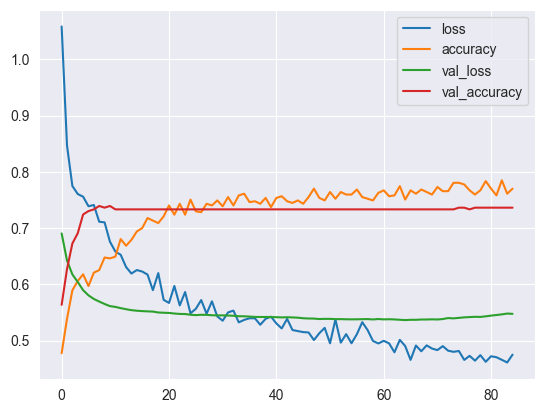

In [71]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [72]:
def check_output():
    indx=rd.randint(0,X_test.shape[0])
    sample=X_test[indx,:]
    sample = np.expand_dims(X_test[indx, :], axis=0)
    y_predict=model.predict(sample)
    Y_check = Y_test.iloc[indx]
    print('True:', Y_check)
    print('Predicted',y_predict)

In [73]:
n_check=5
for i in range(100):
    check_output()

1/1 [==============================] - 0s 64ms/step
True: 0
Predicted [[0.01878166]]
1/1 [==============================] - 0s 16ms/step
True: 1
Predicted [[0.21206693]]
1/1 [==============================] - 0s 18ms/step
True: 1
Predicted [[0.22772598]]
1/1 [==============================] - 0s 16ms/step
True: 0
Predicted [[0.27698472]]
1/1 [==============================] - 0s 18ms/step
True: 0
Predicted [[0.23734212]]
1/1 [==============================] - 0s 18ms/step
True: 0
Predicted [[0.41843396]]
1/1 [==============================] - 0s 19ms/step
True: 0
Predicted [[0.04219307]]
1/1 [==============================] - 0s 17ms/step
True: 1
Predicted [[0.1343832]]
1/1 [==============================] - 0s 19ms/step
True: 0
Predicted [[0.05711362]]
1/1 [==============================] - 0s 17ms/step
True: 0
Predicted [[0.212951]]
1/1 [==============================] - 0s 18ms/step
True: 0
Predicted [[0.1307005]]
1/1 [==============================] - 0s 18ms/step
True: 0
Predicted

1/1 [==============================] - 0s 19ms/step
True: 0
Predicted [[0.09111585]]
1/1 [==============================] - 0s 18ms/step
True: 0
Predicted [[0.03563943]]
1/1 [==============================] - 0s 19ms/step
True: 0
Predicted [[0.2685036]]


In [74]:
probabilities = model.predict(X_test)

# Use argmax to convert probabilities to class labels
predictions = np.argmax(probabilities, axis=-1)

11/11 [==============================] - 0s 802us/step


In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       242
           1       0.00      0.00      0.00        88

    accuracy                           0.73       330
   macro avg       0.37      0.50      0.42       330
weighted avg       0.54      0.73      0.62       330



In [77]:
print(confusion_matrix(Y_test,predictions))

[[242   0]
 [ 88   0]]
